<a href="https://colab.research.google.com/github/Whereamiactually/lyceumcompling11/blob/main/NLTK_WordNet_FrameNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLTK

Natural Language Toolkit (набор инструментов для естественной обработки языка) - пакет библиотек и программ для обработки естественного языка (токенизация, стемминг, лемматизация, POS-тэггинг, графическое представление структуры, семантические рассуждения, ...).

In [4]:
!pip install nltk

In [9]:
pip install svgling # понадобится для NER

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.1 MB/s eta 0:00:00


In [5]:
import nltk
nltk.download('punkt') # для word_tokenize
nltk.download('averaged_perceptron_tagger') # для pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Recap

Вспомним про то, как получить частотность слов, а также про то, как отбросить самые частотные "бессмысленные" слова (stopwords).

Brown University Standard Corpus of Present-Day American English (Brown Corpus) - корпус текстов на американском английском, первый структурированный корпус текстов разных жанров (1967).

In [ ]:
nltk.download('brown')
brown = nltk.corpus.brown
brown.words()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [ ]:
frequency = nltk.FreqDist(brown.words())

In [ ]:
frequency.most_common(30)

Ну такое. Суть потерялась по дороге. Напишем код, который убирает stopwords и пунктуацию.

In [ ]:
nltk.download("stopwords")
stops = list(set(nltk.corpus.stopwords.words("english")))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stops.sort()
stops

In [ ]:
import string
punct = list(string.punctuation)
punct

In [ ]:
# здесь ваш код

# Стемминг и лемматизация

Поделим на слова небольшой текст, используя `nltk.word_tokenize()`. Но вначале уберём пунктуацию с помощью регулярных выражений.

In [2]:
import re

In [ ]:
text = """Tell me, O Muse, of the man of many devices, who wandered full many ways after he had sacked
the sacred citadel of Troy. Many were the men whose cities he saw and whose mind he learned, aye, and many
the woes he suffered in his heart upon the sea, seeking to win his own life and the return of his comrades.
"""
# здесь ваш код

Tell me O Muse of the man of many devices who wandered full many ways after he had sacked
the sacred citadel of Troy Many were the men whose cities he saw and whose mind he learned aye and many
the woes he suffered in his heart upon the sea seeking to win his own life and the return of his comrades



Мы могли бы сделать то же самое с помощью метода `translate()`.

In [ ]:
import string
string.punctuation # строка со всеми знаками пунктуации

str

In [ ]:
text_wo_punct = text.translate(str.maketrans('', '', string.punctuation)) # заменяет ''(1) на ''(2) и убирает пунктуацию
print(text_wo_punct)

Tell me O Muse of the man of many devices who wandered full many ways after he had sacked
the sacred citadel of Troy Many were the men whose cities he saw and whose mind he learned aye and many
the woes he suffered in his heart upon the sea seeking to win his own life and the return of his comrades



In [ ]:
tokens = nltk.word_tokenize(text_wo_punct)
tokens

Разметим части речи у выделенных нами слов. На этой [картинке](https://github.com/Whereamiactually/lyceumcompling11/blob/main/POS%20tags%20(NLTK).png) дана расшифровка всех условных сокращений с примерами из английского языка.




In [ ]:
tagged_tokens = nltk.pos_tag(tokens)
tagged_tokens

Подсчитайте количество слов каждой части речи.

In [ ]:
# здесь ваш код

In [ ]:
from nltk.stem import PorterStemmer

Напишите код, который создаёт словарь, где ключами являются исходные словоформы, а их значениями - их основы (stems).

In [ ]:
stems = {}
ps = PorterStemmer()
# здесь ваш код, используйте ps.stem()

Стемминг vs лемматизация: в чём разница?

Это всё способы нормализации.

Лемма - словарная форма слова. Лемматизация учитывает морфологический анализ слов и использует словарь.

Стемминг работает, не учитывая контекст и морфологические характеристики слова, а просто грубо отсекает "лишнее" от корней слов, в том числе и словообразовательные суффиксы.

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Создайте словарь, где ключами являются исходные словоформы, а их значениями - их леммы.

In [ ]:
lemmas = {}
wl = WordNetLemmatizer()
# здесь ваш код, используйте wl.lemmatize

Хм, работает не совсем так, как нам бы хотелось! Хотя как будто лучше, чем стемминг.

Следующий код сравнивает обработку стеммингом с обработкой лемматизацией.

In [ ]:
dict_compare = {}
for i in stems:
  if stems[i] != lemmas[i]:
    dict_compare[stems[i]] = lemmas[i]
dict_compare

{'tell': 'Tell',
 'o': 'O',
 'muse': 'Muse',
 'mani': 'Many',
 'devic': 'device',
 'wander': 'wandered',
 'sack': 'sacked',
 'sacr': 'sacred',
 'troy': 'Troy',
 'citi': 'city',
 'learn': 'learned',
 'suffer': 'suffered',
 'hi': 'his',
 'seek': 'seeking',
 'comrad': 'comrade'}

Как видно, стемминг, в отличие от лемматизации, хорошо справляется с обработкой глаголов. Это так потому, что для корректной работы лемматизации ей необходимо давать информацию о части речи обрабатываемого ею слова. Иначе  она считает, что слово является существительным.

In [ ]:
def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
      return wordnet.ADJ
    elif nltk_tag.startswith('V'):
      return wordnet.VERB
    elif nltk_tag.startswith('N'):
      return wordnet.NOUN
    elif nltk_tag.startswith('R'):
      return wordnet.ADV
    else:
      return None

def lemmatize_w_pos(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_dict = {}
    for word, tag in wordnet_tagged:
        if tag is None:
          lemmatized_dict[word] = word
        else:
          lemmatized_dict[word] = wl.lemmatize(word, tag)
    return lemmatized_dict

lemmatize_w_pos(text_wo_punct)

NER - Named Entity Recognition.

In [7]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

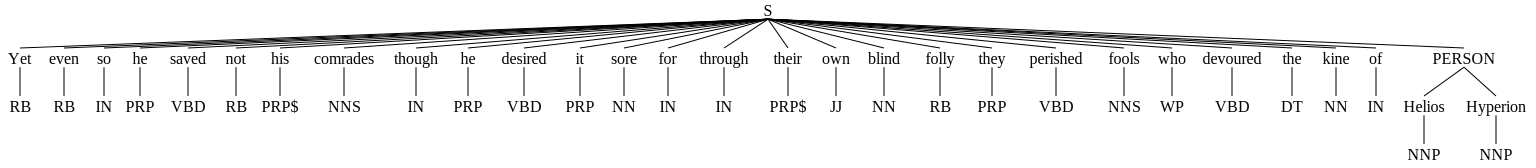

In [ ]:
sentence_1 = """Yet even so he saved not his comrades, though he desired it sore, for through
their own blind folly they perished — fools, who devoured the kine of Helios Hyperion.
"""
sentence_wo_punct_1 = re.sub(r'[^\w\s]', '', sentence_1)
tokens = nltk.word_tokenize(sentence_wo_punct_1)
taggs = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(taggs)
entities

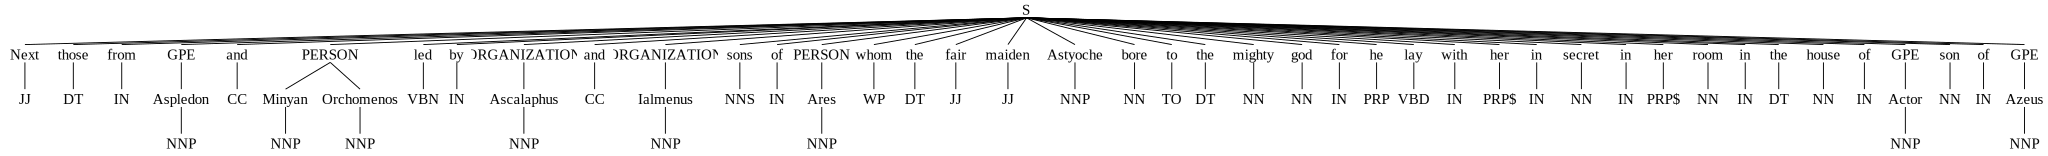

In [10]:
sentence_2 = """Next those from Aspledon and Minyan Orchomenos, led by Ascalaphus and Ialmenus, sons of Ares whom the fair maiden Astyoche
bore to the mighty god, for he lay with her in secret, in her room in the house of Actor, son of Azeus.
"""
sentence_wo_punct_2 = re.sub(r'[^\w\s]', '', sentence_2)
tokens = nltk.word_tokenize(sentence_wo_punct_2)
taggs = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(taggs)
entities

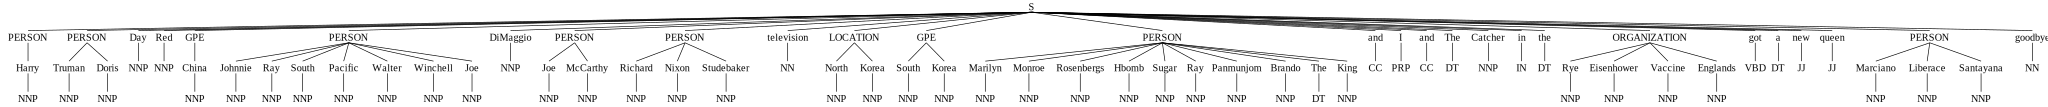

In [13]:
sentence_3 = """Harry Truman, Doris Day, Red China, Johnnie Ray
South Pacific, Walter Winchell, Joe DiMaggio
Joe McCarthy, Richard Nixon, Studebaker, television
North Korea, South Korea, Marilyn Monroe
Rosenbergs, H-bomb, Sugar Ray, Panmunjom
Brando, "The King and I", and "The Catcher in the Rye"
Eisenhower, Vaccine, England's got a new queen
Marciano, Liberace, Santayana, goodbye.
"""
sentence_wo_punct_3 = re.sub(r'[^\w\s]', '', sentence_3)
tokens = nltk.word_tokenize(sentence_wo_punct_3)
taggs = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(taggs)
entities

А ещё можно рисовать крутые деревья!

In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

In [ ]:
%matplotlib inline

In [ ]:
!apt install ghostscript python3-tk

In [ ]:
from nltk.tree import Tree
from IPython.display import display

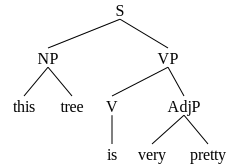

In [ ]:
chunked_sentence = '(S (DP (D this) tree) (VP (V is) (AdjP (AdvP very) pretty)))'
tree = Tree.fromstring(str(chunked_sentence))
display(tree)

In [ ]:
chunked_sentence_1 = '(S (DP I) (VP (V have) (V eaten (DP (D (the) cake)))))'
tree = Tree.fromstring(str(chunked_sentence_1))
display(tree)

# WordNet

Функция `synsets()` выдает синонимический ряд ("синсет"), объединяющий слова со схожим значением в "узел семантический сети". У каждого синсета есть определение и примеры употребления слов в контексте.

In [ ]:
wordnet.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

Мы можем искать синонимы слов, причём в разных значениях.

In [ ]:
wordnet.synonyms('paper')

[[],
 ['composition', 'report', 'theme'],
 ['newspaper'],
 [],
 [],
 ['newspaper', 'newspaper_publisher'],
 ['newspaper'],
 [],
 ['wallpaper']]

Можем делать это на других языках.

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
wordnet.synonyms('perro', lang = 'spa')

[['can'], []]

[Andiron](https://github.com/Whereamiactually/lyceumcompling11/blob/main/Andiron.png) (или firedog) - это подставка, на которую кладутся брёвна в камин и которая позволяет воздуху циркулировать под ними.

In [ ]:
dog = wordnet.synset('dog.n.01')
dog.hypernyms() # выдаёт гиперонимы

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

In [ ]:
dog.hyponyms() # выдаёт гипонимы

[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01')]

In [ ]:
face = wordnet.synset('face.n.01')
print(face.part_holonyms()) # выдаёт холонимы

[Synset('head.n.01'), Synset('homo.n.02')]
[]


In [ ]:
face.part_meronyms() # выдаёт меронимы

[Synset('beard.n.01'),
 Synset('brow.n.01'),
 Synset('cheek.n.01'),
 Synset('chin.n.01'),
 Synset('eye.n.01'),
 Synset('eyebrow.n.01'),
 Synset('facial.n.01'),
 Synset('facial_muscle.n.01'),
 Synset('facial_vein.n.01'),
 Synset('feature.n.02'),
 Synset('jaw.n.02'),
 Synset('jowl.n.02'),
 Synset('mouth.n.02'),
 Synset('nose.n.01')]

In [ ]:
dog.root_hypernyms() # находит самый высокий гипероним

[Synset('entity.n.01')]

In [ ]:
wordnet.synset('dog.n.01').lowest_common_hypernyms(wordnet.synset('cat.n.01')) # находит самый низкий уровень, который их объединяет

[Synset('carnivore.n.01')]

In [ ]:
wordnet.synsets('hate')
hate = wordnet.synset('hate.n.01')
hate.root_hypernyms()

[Synset('entity.n.01')]

In [ ]:
wordnet.synset('hate.n.01').lowest_common_hypernyms(wordnet.synset('cat.n.01'))

[Synset('entity.n.01')]

In [ ]:
wordnet.synset('hate.n.01').lowest_common_hypernyms(wordnet.synset('love.n.01'))

[Synset('emotion.n.01')]

In [ ]:
wordnet.synsets('dance')

[Synset('dance.n.01'),
 Synset('dance.n.02'),
 Synset('dancing.n.01'),
 Synset('dance.n.04'),
 Synset('dance.v.01'),
 Synset('dance.v.02'),
 Synset('dance.v.03')]

In [ ]:
dance = wordnet.synset('dance.v.01')
print(dance.hypernyms())
print(dance.hyponyms())
print(dance.root_hypernyms() )
print(wordnet.synset('hate.v.01').lowest_common_hypernyms(wordnet.synset('dance.v.01')))

[Synset('move.v.03')]
[Synset('capriole.v.02'), Synset('chasse.v.01'), Synset('glissade.v.01')]
[Synset('move.v.03')]
[]


Также мы можем получить определение синсета.

In [ ]:
wordnet.synset('dog.n.01').definition()

'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds'

In [ ]:
wordnet.synset('dog.n.03').definition()

'informal term for a man'

In [ ]:
wordnet.synset('dance.v.01').definition()

'move in a graceful and rhythmical way'

Ещё мы можем посмотреть на "следствия".

In [ ]:
wordnet.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

# FrameNet

FrameNet основывается на теории значения Чарльза Филлмора (1929-2014). Идея проста: значение слов лучше всего представляется с помощью semantic frame (семантической рамки), которая включает в себя описание ситуации, отношения и их участников.

In [15]:
from pprint import pprint
from operator import itemgetter
from nltk.corpus import framenet as fn
from nltk.corpus.reader.framenet import PrettyList
nltk.download('framenet_v17')
x = fn.frames(r'(?i)crim')
x.sort(key=itemgetter('ID'))
PrettyList(sorted(x, key=itemgetter('ID')))

[nltk_data] Downloading package framenet_v17 to /root/nltk_data...
[nltk_data]   Unzipping corpora/framenet_v17.zip.


[<frame ID=200 name=Criminal_process>, <frame ID=500 name=Criminal_investigation>, ...]

In [26]:
from pprint import pprint
from nltk.corpus import framenet as fn
f = fn.frame(202)
f.name

'Arrest'

In [24]:
f.definition

"This frame concerns rituals performed in line with religious beliefs or tradition.  'In certain fertility rites in Burma , a woman desirous of offspring is required not only to approach the King Cobra but to plant a kiss on its mouth .'  'He was ordered a priest in 1944. CNI '"

In [25]:
len(f.lexUnit)

38

In [19]:
pprint(sorted([x for x in f.FE]))

['Authorities',
 'Charges',
 'Co-participant',
 'Manner',
 'Means',
 'Offense',
 'Place',
 'Purpose',
 'Source_of_legal_authority',
 'Suspect',
 'Time',
 'Type']
